# BTS 자료분석
> Best Trip Service
> (원자료) 국민여행조사_국내여행

- 이전 원자료 수정 작업
- 결측치가 많은정보 제거 (2일차 이후의 여행정보 제거)
- 해석하기 어려운 데이터 제거 (여행자의 올해 여행 정보)
- 불필요한 데이터 제거 (여행을 가지 않은 이유)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [3]:
data = pd.read_csv('(원자료) 2020년 국민여행조사_국내여행.csv',index_col='ID')


In [4]:
d11 = data['A11'] > 4
d12 = data['A12'] > 4
d13 = data['A13'] > 4

data['total'] = d11 + d12 +d13
data['total'] = data['total'].map({True:1,False:0})

data.drop(['A11'], axis=1, inplace= True)
data.drop(['A12'], axis=1, inplace= True)
data.drop(['A13'], axis=1, inplace= True)
data.drop(['BARA'],axis=1, inplace= True)

data.drop(['WT_DOM'],axis=1, inplace=True)
data.drop(['BJOB'],axis=1, inplace= True)
data.drop(['BINC1'],axis=1, inplace= True)
data.drop(['BMON'],axis=1, inplace= True)
data.drop(['BMAR'],axis=1, inplace= True)

In [5]:
data = data[data['D_TRA1_CHECK']=='Y']
data = data[data['D_TRA1_CASE']==1]

In [6]:
spot = data['D_TRA1_1_SPOT']

In [7]:
data.shape

(10638, 50)

In [8]:
data.groupby(data['D_TRA1_1_SPOT']).sum().sort_values(["D_TRA1_CASE"], ascending=False).head(20)


,D_TRA1_CASE,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,A1_1,...,A7B_6,A7B_7,A9,NA9,BSEX,BAGE,SAGE,BEDU,BFAM,total
D_TRA1_1_SPOT,,,,,,,,,,,,,,,,,,,,,
39020.0,333.0,2332.0,4887.0,2315.0,5297.0,624.0,353394401.0,903.0,148097111.0,1309,...,0.0,0.0,373109036,145061442,518,1251,13993,1220,864,147
37020.0,324.0,2114.0,4861.0,2116.0,4914.0,114.0,72341400.0,872.0,28782730.0,446,...,0.0,0.0,74272519,27661673,499,1111,12715,1168,833,94
32030.0,312.0,2203.0,4708.0,2161.0,4805.0,282.0,123750000.0,828.0,51771477.0,417,...,0.0,0.0,127907819,49283429,475,1106,12569,1143,820,85
39010.0,270.0,1870.0,3928.0,1856.0,4184.0,561.0,308520000.0,736.0,126617460.0,1089,...,0.0,0.0,339816880,127032147,428,994,11160,1008,689,130
31370.0,255.0,1675.0,3656.0,1675.0,3767.0,111.0,58186500.0,658.0,24352934.0,379,...,0.0,7.0,58411606,22155305,366,808,9370,935,652,73
32060.0,246.0,1766.0,3910.0,1768.0,4110.0,261.0,131346955.0,769.0,45897289.0,299,...,6.0,0.0,134330722,45186164,372,948,10666,879,633,96
34030.0,242.0,1644.0,3427.0,1646.0,3465.0,99.0,63707800.0,665.0,25434815.0,301,...,0.0,0.0,69653685,23899230,350,799,9195,883,627,63
21090.0,225.0,1477.0,3491.0,1478.0,3615.0,155.0,78081666.0,545.0,37153267.0,434,...,0.0,0.0,82530519,35356590,345,664,7746,841,583,62
37010.0,204.0,1454.0,3230.0,1434.0,3166.0,59.0,41197008.0,532.0,17944348.0,242,...,0.0,0.0,43815706,17165356,302,757,8526,736,531,59


# 결측치 처리

In [9]:
all_na = (data.isnull().sum() / len(data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_na})

Text(0.5, 1.0, 'Percent missing data by feature')

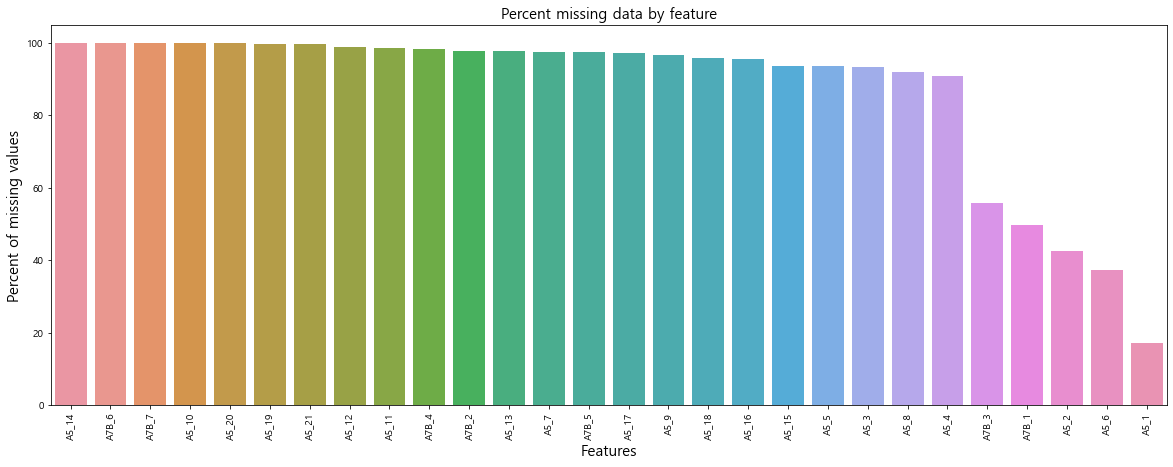

In [10]:
f, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [11]:
# 여행활동 이진 변수로 변경
for i in range(21):
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].fillna(0)
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].map({i+1:1,0:0})
# 여행 동반자 유형
for i in range(7):
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].fillna(0)
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].map({i+1:1,0:0})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10638 entries, 11080760641_204453 to 3902057133A_260717
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   D_TRA1_CHECK     10638 non-null  object 
 1   D_TRA1_CASE      10638 non-null  float64
 2   D_TRA1_SMONTH    10638 non-null  float64
 3   D_TRA1_SDAY      10638 non-null  float64
 4   D_TRA1_EMONTH    10638 non-null  float64
 5   D_TRA1_EDAY      10638 non-null  float64
 6   D_TRA1_S_Day     10638 non-null  float64
 7   D_TRA1_COST      10638 non-null  float64
 8   D_TRA1_NUM       10638 non-null  float64
 9   D_TRA1_ONE_COST  10638 non-null  float64
 10  D_TRA1_1_SPOT    10638 non-null  float64
 11  A1_1             10638 non-null  int64  
 12  A4_1             10638 non-null  int64  
 13  A5_1             10638 non-null  int64  
 14  A5_2             10638 non-null  int64  
 15  A5_3             10638 non-null  int64  
 16  A5_4             10638 non-null  

In [13]:
data

,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,...,A7B_6,A7B_7,A9,NA9,BSEX,BAGE,SAGE,BEDU,BFAM,total
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,Y,1.0,8.0,9.0,8.0,9.0,0.0,40000.0,1.0,40000.0,...,0,0,77000,39500,1,4,45,3,3,0
21110610901_148196,Y,1.0,6.0,22.0,6.0,23.0,1.0,90000.0,1.0,90000.0,...,0,0,249997,78571,1,2,25,4,1,0
2231011065A_7203,Y,1.0,1.0,17.0,1.0,17.0,0.0,90000.0,3.0,30000.0,...,0,0,90003,30001,2,5,53,3,3,0
2302055001A_181404,Y,1.0,7.0,25.0,7.0,25.0,0.0,21000.0,2.0,22000.0,...,0,0,44000,22000,1,3,35,4,2,0
2305060097A_38902,Y,1.0,2.0,29.0,2.0,29.0,0.0,40000.0,2.0,20000.0,...,0,0,39400,19700,2,1,19,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,Y,1.0,4.0,18.0,4.0,18.0,0.0,150000.0,4.0,37500.0,...,0,0,150000,52500,1,3,38,4,3,1
3901054306A_172336,Y,1.0,6.0,28.0,6.0,28.0,0.0,30000.0,2.0,15000.0,...,0,0,30000,15000,2,3,35,4,2,1
39010631871_142345,Y,1.0,2.0,21.0,2.0,21.0,0.0,20000.0,1.0,20000.0,...,0,0,20000,20000,1,4,41,4,3,1


# 변수 분류

In [14]:
for i in data:
    print(f'"{i}",')

"D_TRA1_CHECK",
"D_TRA1_CASE",
"D_TRA1_SMONTH",
"D_TRA1_SDAY",
"D_TRA1_EMONTH",
"D_TRA1_EDAY",
"D_TRA1_S_Day",
"D_TRA1_COST",
"D_TRA1_NUM",
"D_TRA1_ONE_COST",
"D_TRA1_1_SPOT",
"A1_1",
"A4_1",
"A5_1",
"A5_2",
"A5_3",
"A5_4",
"A5_5",
"A5_6",
"A5_7",
"A5_8",
"A5_9",
"A5_10",
"A5_11",
"A5_12",
"A5_13",
"A5_14",
"A5_15",
"A5_16",
"A5_17",
"A5_18",
"A5_19",
"A5_20",
"A5_21",
"A7",
"A7B_1",
"A7B_2",
"A7B_3",
"A7B_4",
"A7B_5",
"A7B_6",
"A7B_7",
"A9",
"NA9",
"BSEX",
"BAGE",
"SAGE",
"BEDU",
"BFAM",
"total",


In [15]:
numeric = [
    "D_TRA1_COST","D_TRA1_NUM","D_TRA1_ONE_COST","A7",
]


In [16]:
nominal = [
    "D_TRA1_CHECK","D_TRA1_CASE","A1_1", "A4_1", 
    "BSEX", "BAGE", "SAGE", "BEDU", "BFAM", 
]
# 명목형 변수 인코딩
for col in nominal:
    data[col] = data[col].apply(str)

In [17]:
binary = [
    "A5_1", "A5_2", "A5_3", "A5_4", "A5_5", "A5_6", "A5_7", "A5_8",
    "A5_9", "A5_10", "A5_11", "A5_12", "A5_13", "A5_14", "A5_15",
    "A5_16", "A5_17","A5_18", "A5_19", "A5_20", "A5_21", "A7B_1",
    "A7B_2", "A7B_3", "A7B_4", "A7B_5", "A7B_6", "A7B_7",
]

In [18]:
data["D_TRA1_1_SPOT"] = data["D_TRA1_1_SPOT"].apply(str)

Text(0, 0.5, 'count')

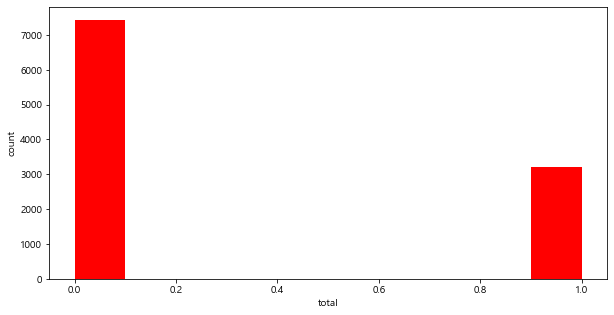

In [19]:
plt.figure(figsize=(10,5))
plt.hist(data['total'],color='red')
plt.xlabel('total')
plt.ylabel('count')

In [20]:
data.corr()['total'].sort_values().head(20)

A7B_3         -0.032198
D_TRA1_NUM    -0.013279
D_TRA1_SDAY   -0.012209
A7B_5         -0.005310
A5_19         -0.005102
A5_10         -0.004791
A5_13         -0.003569
D_TRA1_EDAY   -0.002764
A7B_7         -0.002171
A5_18         -0.002040
A7B_4         -0.001981
A5_16          0.000615
A5_14          0.001170
A7B_6          0.001170
A5_12          0.001784
A5_21          0.002581
A5_20          0.003098
A5_17          0.004159
A7B_2          0.005363
A7             0.019284
Name: total, dtype: float64

In [21]:
feature = []

연속형 변수
- 피어슨 상관 계수
연속형 변수 2개의 상관 관계를 확인하기 위한 가장 기본적인 방법이다.
정확히 말해서 두개의 수치값들의 집합이 있을 때 이 두개의 수치값들은 각각의 순서쌍에 대해서 연결관계가 있다고 할 때 두 수치값이 서로 관련이 있는지를 확인하는 방법이다.

흔한 예로 있는 것이 고등학생 한 학급에 50명이 있다고 할 때 이 학생들의 수학과목의 성적과 물리과목의 성정이 관련이 있는지 확인하는 것이 있다. 즉 수학과목과 물리과목은 서로 수리적 또는 과학적 능력과 관련이 있어 두 과목은 서로 관련이 있을 것이라는 가설을 어느 정도 두고 있으며 실제로 그런지 확인한다.

p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음
https://intothedata.com/02.scholar_category/statistics/correlation/

https://bskyvision.com/754

In [22]:
from scipy import stats
for i in numeric:
    corr, pval = stats.pearsonr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

D_TRA1_COST 9.474000129399422e-33
D_TRA1_ONE_COST 1.6933378081462536e-45
A7 0.046713725063188376


이진 변수
- 점 양분 상관 계수
한 변수는 있음/없음, 네/아니오 등으로 이분형(binary) 이고, 다른 한 변수는 연속형인 경우에도 상관계수를 구할 수 있습니다.

p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음
https://mansoostat.tistory.com/115

In [23]:
from scipy.stats import pointbiserialr
for i in binary:
    corr, pval = pointbiserialr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

A5_1 1.057237106327922e-11
A5_2 9.9742406536892e-13
A5_3 4.101765010210948e-06
A5_4 0.0017944288532242554
A5_5 1.7163740105565753e-09
A5_6 2.106229489038291e-06
A5_7 7.602318634340863e-05
A5_8 5.837559867238211e-11
A5_9 1.8738388466212786e-05
A5_11 0.00198598747834124
A5_15 2.724686219829359e-18
A7B_1 0.00010512246066139061
A7B_3 0.000895713806665898


명목형 변수 one-hot-encoding

In [24]:
nominal

obdata=pd.DataFrame()
for i in nominal:
    obdata[i]=data[i]
obdata = pd.get_dummies(obdata)

In [25]:
obdata

,D_TRA1_CHECK_Y,D_TRA1_CASE_1.0,A1_1_1,A1_1_10,A1_1_11,A1_1_2,A1_1_3,A1_1_4,A1_1_5,A1_1_6,...,SAGE_85,SAGE_86,SAGE_87,BEDU_1,BEDU_2,BEDU_3,BEDU_4,BFAM_1,BFAM_2,BFAM_3
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
21110610901_148196,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2231011065A_7203,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2302055001A_181404,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2305060097A_38902,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3901054306A_172336,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
39010631871_142345,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [26]:
obfeature=[]
for i in obdata.dtypes.index:
    corr, pval = pointbiserialr(obdata[i],data['total'])
    if pval <0.05:
        print(i,'   ',pval)
        obfeature.append(i)

A1_1_11     0.005664376009495872
A1_1_3     2.1125147114453504e-11
A1_1_5     0.0038860340972685483
A1_1_6     1.298282152845974e-10
A1_1_8     0.00020414757557059467
A4_1_1     0.0007141323400370314
A4_1_2     8.301942538970025e-06
A4_1_3     0.021652371952313614
A4_1_4     2.1136736791416454e-08
A4_1_6     0.0003743202792726745
BAGE_1     0.0071879782666163265
SAGE_19     0.0002839320716658538
SAGE_25     0.0013703546414453864
SAGE_27     0.04434011861781306
SAGE_34     0.014424770524347803
SAGE_41     0.034696279250214804
SAGE_54     0.03834620371683675
SAGE_68     0.019036358373836222
SAGE_73     0.04425789528095645


C:\Users\rhkdg\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [27]:
data["D_TRA1_1_SPOT"] = data["D_TRA1_1_SPOT"].apply(str)
local = data["D_TRA1_1_SPOT"]

local = pd.get_dummies(local)
location = []
for i in local.dtypes.index:
    location.append(i)

In [28]:
obdata

,D_TRA1_CHECK_Y,D_TRA1_CASE_1.0,A1_1_1,A1_1_10,A1_1_11,A1_1_2,A1_1_3,A1_1_4,A1_1_5,A1_1_6,...,SAGE_85,SAGE_86,SAGE_87,BEDU_1,BEDU_2,BEDU_3,BEDU_4,BFAM_1,BFAM_2,BFAM_3
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
21110610901_148196,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2231011065A_7203,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2302055001A_181404,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2305060097A_38902,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3901054306A_172336,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
39010631871_142345,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [29]:
X=pd.DataFrame()
for i in feature:
    X[i] = data[i]
    
for i in obfeature:
    X[i] = obdata[i]
for i in local:
    X[i] = local[i]
y = data['total']

C:\Users\rhkdg\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [30]:
X.index

Index(['11080760641_204453', '21110610901_148196', '2231011065A_7203',
       '2302055001A_181404', '2305060097A_38902', '2402069106A_324336',
       '25030560931_97381', '2504054317A_125174', '2504061032A_11754',
       '2504061032A_11785',
       ...
       '38360420481_344130', '38380360191_111885', '38390110071_141400',
       '3901052184A_142569', '3901052184A_56268', '3901053052A_112093',
       '3901054306A_172336', '39010631871_142345', '39020520031_345686',
       '3902057133A_260717'],
      dtype='object', name='ID', length=10638)

In [31]:
y

ID
11080760641_204453    0
21110610901_148196    0
2231011065A_7203      0
2302055001A_181404    0
2305060097A_38902     0
                     ..
3901053052A_112093    1
3901054306A_172336    1
39010631871_142345    1
39020520031_345686    1
3902057133A_260717    1
Name: total, Length: 10638, dtype: int64

In [32]:
X

,D_TRA1_COST,D_TRA1_ONE_COST,A7,A5_1,A5_2,A5_3,A5_4,A5_5,A5_6,A5_7,...,38330.0,38340.0,38350.0,38360.0,38370.0,38380.0,38390.0,38400.0,39010.0,39020.0
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,40000.0,40000.0,4,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21110610901_148196,90000.0,90000.0,7,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2231011065A_7203,90000.0,30000.0,3,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2302055001A_181404,21000.0,22000.0,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2305060097A_38902,40000.0,20000.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,150000.0,37500.0,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3901054306A_172336,30000.0,15000.0,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39010631871_142345,20000.0,20000.0,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import StratifiedKFold

In [34]:
skf = StratifiedKFold(n_splits= 5 , shuffle= True, random_state=0)

In [35]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# import statsmodels.api as sm
# '''
# Statsmodels 패키지는 검정 및 추정(test and estimation), 회귀분석(regression analysis), 
# 시계열 분석(time - series analysis) 등의 기능을 제공하는 파이썬 패키지이다.
# '''

# log_reg = LogisticRegression()

# log_reg.fit(X, y)
# x2 = sm.add_constant(X)
# model = sm.OLS(y, x2)
# result = model.fit()
# print(result.summary())

# print(f'score : {cross_val_score(log_reg, X, y, cv=skf).mean()}')

In [36]:
# log_reg.predict(X)

In [37]:
# log_reg.predict_proba(X.head())

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np


# 훈련/테스트 세트로 나누기

forest = RandomForestClassifier(n_estimators=50,                          
                                max_features = 1,
                                max_depth = 20,
                                random_state = 0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))
print(f'score : {cross_val_score(forest, X, y, cv=skf).mean()}')

훈련 세트 정확도 : 0.697
테스트 세트 정확도 : 0.706
score : 0.6985335516550524


In [67]:
forest.predict_proba(X)

array([[0.71670912, 0.28329088],
       [0.73903287, 0.26096713],
       [0.74003535, 0.25996465],
       ...,
       [0.69960823, 0.30039177],
       [0.6752195 , 0.3247805 ],
       [0.67651559, 0.32348441]])

In [78]:
import joblib
joblib.dump(forest, './forest.pkl')

['./forest.pkl']

In [77]:
data['D_TRA1_1_SPOT']

ID
11080760641_204453    31170.0
21110610901_148196    38090.0
2231011065A_7203      37310.0
2302055001A_181404    31010.0
2305060097A_38902     11010.0
                       ...   
3901053052A_112093    39020.0
3901054306A_172336    39020.0
39010631871_142345    39020.0
39020520031_345686    39010.0
3902057133A_260717    39010.0
Name: D_TRA1_1_SPOT, Length: 10638, dtype: object

In [69]:
a=sorted(data['D_TRA1_1_SPOT'].values[:])

In [70]:
n = 1
for i in X:
    try:
        print(str(int(float(i)))+',')
    except:
        pass
    n+=1

11010,
11020,
11030,
11040,
11050,
11060,
11080,
11090,
11100,
11110,
11120,
11130,
11140,
11150,
11160,
11170,
11180,
11190,
11210,
11220,
11230,
11240,
11250,
21010,
21020,
21030,
21040,
21050,
21060,
21070,
21080,
21090,
21100,
21110,
21120,
21130,
21140,
21310,
22010,
22020,
22040,
22050,
22060,
22070,
22310,
23010,
23020,
23030,
23040,
23050,
23060,
23070,
23080,
23310,
23320,
24010,
24020,
24030,
24040,
24050,
25010,
25020,
25030,
25040,
25050,
26010,
26020,
26030,
26040,
26310,
29010,
31010,
31020,
31030,
31040,
31050,
31060,
31070,
31080,
31090,
31100,
31110,
31120,
31130,
31140,
31150,
31160,
31170,
31180,
31190,
31200,
31210,
31220,
31230,
31240,
31250,
31260,
31270,
31280,
31350,
31370,
31380,
32010,
32020,
32030,
32040,
32050,
32060,
32070,
32310,
32320,
32330,
32340,
32350,
32360,
32370,
32390,
32400,
32410,
33020,
33030,
33040,
33320,
33330,
33340,
33350,
33360,
33370,
33380,
33390,
34010,
34020,
34030,
34040,
34050,
34060,
34070,
34080,
34310,
34330,
34340,
34350,
34360,

In [71]:
#36~259 지역번호
259-36
citys = [11010,
11020,
11030,
11040,
11050,
11060,
11080,
11090,
11100,
11110,
11120,
11130,
11140,
11150,
11160,
11170,
11180,
11190,
11210,
11220,
11230,
11240,
11250,
21010,
21020,
21030,
21040,
21050,
21060,
21070,
21080,
21090,
21100,
21110,
21120,
21130,
21140,
21310,
22010,
22020,
22040,
22050,
22060,
22070,
22310,
23010,
23020,
23030,
23040,
23050,
23060,
23070,
23080,
23310,
23320,
24010,
24020,
24030,
24040,
24050,
25010,
25020,
25030,
25040,
25050,
26010,
26020,
26030,
26040,
26310,
29010,
31010,
31020,
31030,
31040,
31050,
31060,
31070,
31080,
31090,
31100,
31110,
31120,
31130,
31140,
31150,
31160,
31170,
31180,
31190,
31200,
31210,
31220,
31230,
31240,
31250,
31260,
31270,
31280,
31350,
31370,
31380,
32010,
32020,
32030,
32040,
32050,
32060,
32070,
32310,
32320,
32330,
32340,
32350,
32360,
32370,
32390,
32400,
32410,
33020,
33030,
33040,
33320,
33330,
33340,
33350,
33360,
33370,
33380,
33390,
34010,
34020,
34030,
34040,
34050,
34060,
34070,
34080,
34310,
34330,
34340,
34350,
34360,
34370,
34380,
35010,
35020,
35030,
35040,
35050,
35060,
35310,
35320,
35330,
35340,
35350,
35360,
35370,
35380,
36010,
36020,
36030,
36040,
36060,
36310,
36320,
36330,
36350,
36360,
36370,
36380,
36390,
36400,
36410,
36420,
36430,
36440,
36450,
36460,
36470,
36480,
37010,
37020,
37030,
37040,
37050,
37060,
37070,
37080,
37090,
37100,
37310,
37320,
37330,
37340,
37350,
37360,
37370,
37380,
37390,
37400,
37410,
37420,
37430,
38030,
38050,
38060,
38070,
38080,
38090,
38100,
38110,
38310,
38320,
38330,
38340,
38350,
38360,
38370,
38380,
38390,
38400,
39010,
39020,]

In [72]:
cost= 4000000
n = 10
sample = [cost, cost//n, n, 1, 1, 1, 1, 1, 1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0]
city = [0]*224
r = []
for i in range(224):
    city[i] = 1
    temp = forest.predict_proba(pd.DataFrame(sample+city).T)[0][1]
    r.append(temp)
    print(citys[i] ,temp)
    city[i] = 0

11010 0.45373852567087075
11020 0.4562500998430117
11030 0.4503298020754422
11040 0.4725083963724541
11050 0.49523915941220326
11060 0.4722278051406761
11080 0.4325037181857257
11090 0.4756444718073427
11100 0.4386258684745713
11110 0.45555224207761297
11120 0.48018916266755773
11130 0.4533100370045143
11140 0.442638011984451
11150 0.5026204736407633
11160 0.4728640610648467
11170 0.4633899263527973
11180 0.46266776334606236
11190 0.441887251824174
11210 0.4824918598860961
11220 0.4581260559674976
11230 0.447824417020299
11240 0.4661121298480909
11250 0.4825132989678365
21010 0.4835992108696809
21020 0.4728064790487597
21030 0.5067404317347538
21040 0.4552853009405837
21050 0.4925311114834561
21060 0.470787150130799
21070 0.45294091449508966
21080 0.4756444718073427
21090 0.49788845427717027
21100 0.4616034024543787
21110 0.4562193366141651
21120 0.4555594134979144
21130 0.4957333932379593
21140 0.47605786227511393
21310 0.4846468836683922
22010 0.45775627195532903
22020 0.451995971554

In [75]:
from collections import Counter

result = Counter(r)
print(result)

for key in result:
    print(key, result[key])

# 값만 출력도 가능
result = Counter(r).values()
print(result)


Counter({0.4756444718073427: 7, 0.4728640610648467: 2, 0.4581260559674976: 2, 0.45222780514067606: 2, 0.48246186058314966: 2, 0.45373852567087075: 1, 0.4562500998430117: 1, 0.4503298020754422: 1, 0.4725083963724541: 1, 0.49523915941220326: 1, 0.4722278051406761: 1, 0.4325037181857257: 1, 0.4386258684745713: 1, 0.45555224207761297: 1, 0.48018916266755773: 1, 0.4533100370045143: 1, 0.442638011984451: 1, 0.5026204736407633: 1, 0.4633899263527973: 1, 0.46266776334606236: 1, 0.441887251824174: 1, 0.4824918598860961: 1, 0.447824417020299: 1, 0.4661121298480909: 1, 0.4825132989678365: 1, 0.4835992108696809: 1, 0.4728064790487597: 1, 0.5067404317347538: 1, 0.4552853009405837: 1, 0.4925311114834561: 1, 0.470787150130799: 1, 0.45294091449508966: 1, 0.49788845427717027: 1, 0.4616034024543787: 1, 0.4562193366141651: 1, 0.4555594134979144: 1, 0.4957333932379593: 1, 0.47605786227511393: 1, 0.4846468836683922: 1, 0.45775627195532903: 1, 0.45199597155491766: 1, 0.4625311114834561: 1, 0.445925559806444